In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(9,6)}, font_scale = 1.5)

In [2]:
# Display raw data
df_375 = pd.read_excel(io = "time_series_375_preprocess_en.xlsx")

df_375

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,NaN,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,NaN,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,NaN,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,NaN,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Research

After a review of the findings of multiple studies in the field, we have selected a set of biomarkers for our project. These biomarkers have been identified as key indicators for predicting mortality and disease severity in COVID-19 patients. The inclusion of these specific biomarkers in our analysis is supported by their established roles in reflecting critical physiological processes relevant to COVID-19 prognosis.

|Biomarker|Description|
|:-------|:--------|
|Hypersensitive cardiac troponinI|Hypersentitive tropinin I is a biomarker for the detection of cardnial injury, patients with elevated tropinin I levels had a higher odds of poor outcome|
|Prothrombin time|Pothrombin time represents the amount of time it takes for a blood clot to form|
|procalcitonin|This is a marker of bacterial infection, and elevated levels have been associated with increased mortality in COVID-19 patients
|(%)lymphocyte|A lymphocyte is a type of white blood cellthat is part of the immune system. A low lymphocyte count will result in a disorder called lymphocytopenia which will make an individual more prone to infections.|
|D-D dimer|D-dimer is a protein in the body that breaks down blood clots. Elevated levels have been found to decrease your likelihood of surviving COVID-19. A D-dimer level of above 2.01ug/ml is a significant predictor or subsequent deaths|
|Lactate dehydrogenase|Lactate dehydrogenase is an exzyme that the body uses to turn sugar into energy. Elevated levels indicate tissue damage as they are releasen into the bloodstream. Elevated LDH is associated with a poor outcome in COVID-19|
|Interleukin 6|This is a cytokine involved in inflammation and immune response, and elevated levels have been associated with increased mortality in COVID-19 patients.|
|Hypersensitive c-reactive protein|This is a marker of inflammation that predicts various cardiac diseases.|  

In [3]:
# Choose biomarkers
# biomarkers = ['Hypersensitive cardiac troponinI', 'Prothrombin time', 'procalcitonin', '(%)lymphocyte', 'D-D dimer', 'Lactate dehydrogenase', 'Interleukin 6', 'Hypersensitive c-reactive protein', 'age', 'gender']
biomarkers = ['(%)lymphocyte', 'Lactate dehydrogenase', 'Hypersensitive c-reactive protein', 'age', 'gender']
patient_data = ['PATIENT_ID', 'outcome']
df = df_375.loc[:, patient_data + biomarkers]

# Fill up empty patient IDs
df['PATIENT_ID'] = df['PATIENT_ID'].ffill()
df = df.fillna(0)

# Find the average value of the biomarkers for each patient
df = df.groupby(patient_data)[biomarkers].apply(lambda x: x[x != 0].mean()).round(1).reset_index()

# Drop the patients with no biomarkers recorded
df = df.dropna(subset=df.columns.difference(['PATIENT_ID', 'outcome', 'age', 'gender']), how='all')
df

,PATIENT_ID,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein,age,gender
0,1.0,0,22.7,232.0,16.4,73.0,1.0
1,2.0,0,13.6,450.2,27.4,61.0,1.0
2,3.0,0,26.5,274.3,23.0,70.0,2.0
3,4.0,0,18.2,293.5,61.4,74.0,1.0
4,5.0,0,30.7,187.0,3.9,29.0,2.0
...,...,...,...,...,...,...,...
370,371.0,1,15.0,573.0,152.0,63.0,1.0
371,372.0,1,1.6,383.7,232.2,79.0,1.0
372,373.0,1,6.3,702.0,205.8,61.0,2.0
373,374.0,1,2.3,1706.3,109.8,33.0,1.0


In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df).round(1))
# df.rename(columns={0: 'PATIENT_ID', 1: 'outcome', 2: 'Hypersensitive cardiac troponinI', 3: 'Prothrombin time', 4: 'procalcitonin', 5: '(%)lymphocyte', 6: 'D-D dimer', 7: 'Lactate dehydrogenase', 8: 'Interleukin 6', 9: 'Hypersensitive c-reactive protein', 10: 'age', 11: 'gender'}, inplace=True)
df.rename(columns={0: 'PATIENT_ID', 1: 'outcome', 2: '(%)lymphocyte', 3: 'Lactate dehydrogenase', 4: 'Hypersensitive c-reactive protein', 5: 'age', 6: 'gender'}, inplace=True)

df

,PATIENT_ID,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein,age,gender
0,1.0,0.0,22.7,232.0,16.4,73.0,1.0
1,2.0,0.0,13.6,450.2,27.4,61.0,1.0
2,3.0,0.0,26.5,274.3,23.0,70.0,2.0
3,4.0,0.0,18.2,293.5,61.4,74.0,1.0
4,5.0,0.0,30.7,187.0,3.9,29.0,2.0
...,...,...,...,...,...,...,...
353,371.0,1.0,15.0,573.0,152.0,63.0,1.0
354,372.0,1.0,1.6,383.7,232.2,79.0,1.0
355,373.0,1.0,6.3,702.0,205.8,61.0,2.0
356,374.0,1.0,2.3,1706.3,109.8,33.0,1.0


In [5]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

# Prepare features and targets
X = df.drop(['outcome', 'PATIENT_ID'], axis=1) # Features
y = df['outcome'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X_test={}, y_test={}".format(X_test.shape, y_test.shape))

# Set up number of folds for K-Folds Cross validation
folds = StratifiedKFold(n_splits = 10)

Training set shape: X_train=(286, 5), y_train=(286,)
Testing set shape: X_test=(72, 5), y_test=(72,)


In [6]:
def train_test_model (model, X, y, X_train, X_test, y_train, y_test):
    # Train model
    result = model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)

    # Perform k-fold cross-validation
    folds = StratifiedKFold(n_splits = 10)    
    print('Cross Validation Scores: ', cross_val_score(model, X, y, cv=5))

    # Compute ROC curve and AUC score
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    # Evaluate the model's performance
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('Recall score: ', metrics.recall_score(y_test, y_pred))
    print('f1 score: ', metrics.f1_score(y_test, y_pred))

    # Display a confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    confusion_matrix.plot()
    plt.title('Confusion Matrix')
    plt.show()
    
    return fpr, tpr, roc_auc

Cross Validation Scores:  [0.97222222 0.95833333 0.97222222 0.98591549 0.92957746]
Accuracy:  1.0
Recall score:  1.0
f1 score:  1.0


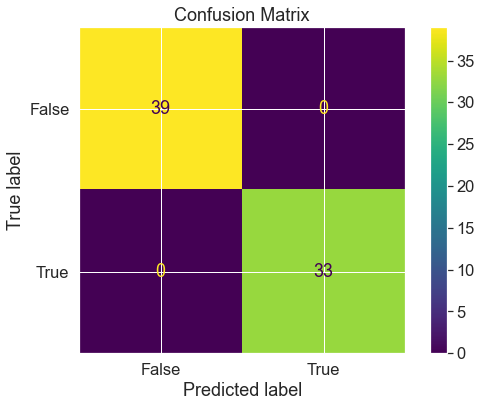

In [7]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg = LogisticRegression(max_iter=10000) 

lr_fpr, lr_tpr, lr_roc_auc = train_test_model(logreg, X, y, X_train, X_test, y_train, y_test)

Cross Validation Scores:  [0.97222222 0.94444444 0.94444444 0.94366197 0.94366197]
Accuracy:  0.9583333333333334
Recall score:  1.0
f1 score:  0.9565217391304348


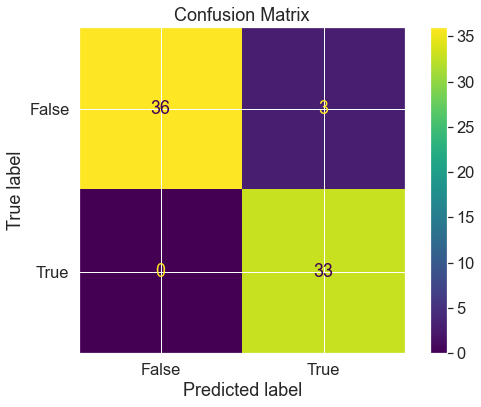

In [8]:
from sklearn.svm import SVC

# Create a SVM classifier
svm = SVC()

svm_fpr, svm_tpr, svm_roc_auc = train_test_model(svm, X, y, X_train, X_test, y_train, y_test)

Cross Validation Scores:  [0.95833333 0.93055556 0.97222222 0.98591549 0.94366197]
Accuracy:  0.9861111111111112
Recall score:  1.0
f1 score:  0.9850746268656716


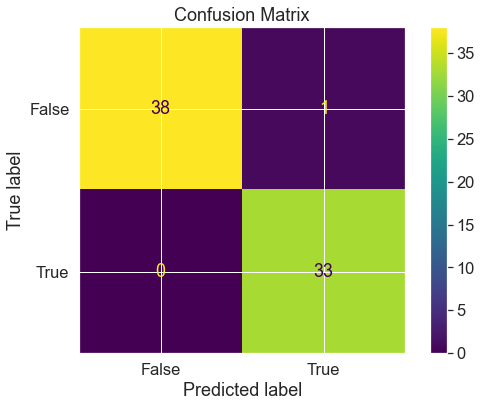

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

rf_fpr, rf_tpr, rf_roc_auc = train_test_model(rf, X, y, X_train, X_test, y_train, y_test)

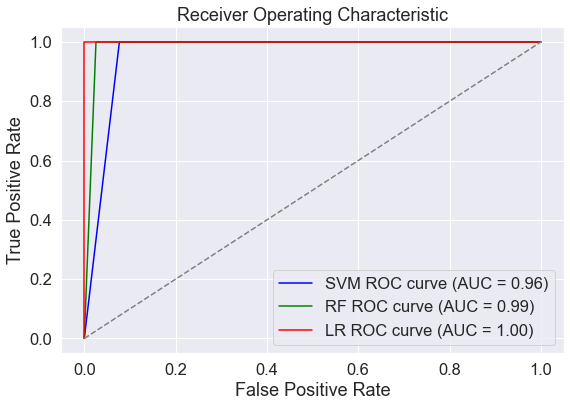

In [10]:
# Plot ROC curve
plt.plot(svm_fpr, svm_tpr, color='blue', label='SVM ROC curve (AUC = {:.2f})'.format(svm_roc_auc))
plt.plot(rf_fpr, rf_tpr, color='green', label='RF ROC curve (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(lr_fpr, lr_tpr, color='red', label='LR ROC curve (AUC = {:.2f})'.format(lr_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()